In [1]:
import glob,os
import pandas as pd
import numpy as np
import pandas as pd
import os,glob
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append(os.path.expanduser("~") + "/collproc/")
from raw import *
from coll import *
sys.path.append(os.path.expanduser("~"))
from ss2csv.ss2csv import file2table,cleancols
import matplotlib.pyplot as plt

In [2]:
df = unpkl('raw.pkl')

In [3]:
df = df[[item for item in df.columns if 'nm' not in item]+[item for item in df.columns if 'nm' in item]]

In [116]:
len(df[df.mmode.isnull()])

42

In [121]:
print(list(df.catalog[df.mmode.isnull()].unique()))

['4277', '4278', '4823', '4824', '4826', '4828', '2302', '4844', '4298', '4842', '4843', '4825', '1525', '4827']


# Enumeration of cases

In [128]:
def fspread(list1, list2):
    return list1[:-1] == list2[:-1] and list1[-1] != list2[-1]

In [129]:
for catalog in df.catalog.unique():
    tmp = df[df.catalog==catalog]
    
    fnames = tmp.fname.unique()
    fnames = [item[:-4] for item in fnames]
    fname_list = [item.split("_") for item in fnames]
    
    if all([
        len(tmp.fname.unique())==1,
        len(tmp.manbran.unique())==1,
        any([
            [len(tmp.mloc.value_counts().unique())==1, len(tmp.mloc.unique())==2],
            tmp.mloc.isna().all()
        ]),
        len(tmp.mmode.value_counts().unique())==1,
        len(tmp.mmode.unique())==3,
    ]):
        continue
    else:
        if any([stem in catalog for stem in ['4792', '4793', '5411', '5413', 
                                             '4911', '1006', '507', '5436']]):
            continue
        elif catalog in ['5149', '5150', '5151', '5154', '4231', '4945']:
            continue
        elif catalog in ['4277', '4278', '4823', '4824', '4826', '4828', 
                         '2302', '4844', '4298', '4842', '4843', '4825', '1525', '4827']:
            continue
        elif len(fname_list)==2 and fspread(fname_list[0],fname_list[1]):
            continue
        else:
            print(catalog,end='\t')

5209ff	2569	2240	5441	2173	4949	2372nn	2	5046	2355	369	285b	2883	

In [126]:
tmp = df[df.catalog=='1402']
tmp.sort_values(['fname','manbran','mloc','mtrial','mmode'])

,SAMPLE_ID1,LAB_L,LAB_A,LAB_B,fname,catalog,manbran,mtrial,mloc,mmode,...,nm640,nm650,nm660,nm670,nm680,nm690,nm700,nm710,nm720,nm730
93016,"""1402_dc-1 M0""",93.31,-1.86,11.56,color_km_binder2_2.txt,1402,dc,1,None,M0,...,8.920174E-1,8.980519E-1,9.036189E-1,9.067399E-1,9.079345E-1,9.103713E-1,9.145084E-1,9.180208E-1,9.207262E-1,9.259229E-1
93017,"""1402_dc-1 M1""",93.34,-1.92,11.52,color_km_binder2_2.txt,1402,dc,1,None,M1,...,8.920174E-1,8.980519E-1,9.036189E-1,9.067399E-1,9.079345E-1,9.103713E-1,9.145084E-1,9.180208E-1,9.207262E-1,9.259229E-1
93018,"""1402_dc-1 M2""",93.28,-1.88,11.79,color_km_binder2_2.txt,1402,dc,1,None,M2,...,8.920174E-1,8.980519E-1,9.036189E-1,9.067399E-1,9.079345E-1,9.103713E-1,9.145084E-1,9.180208E-1,9.207262E-1,9.259229E-1
93019,"""1402_dc-2 M0""",93.16,-1.70,12.34,color_km_binder2_2.txt,1402,dc,2,None,M0,...,8.936754E-1,8.999348E-1,9.055979E-1,9.085110E-1,9.101052E-1,9.126440E-1,9.168541E-1,9.204511E-1,9.232208E-1,9.284256E-1
93020,"""1402_dc-2 M1""",93.19,-1.77,12.29,color_km_binder2_2.txt,1402,dc,2,None,M1,...,8.936754E-1,8.999348E-1,9.055979E-1,9.085110E-1,9.101052E-1,9.126440E-1,9.168541E-1,9.204511E-1,9.232208E-1,9.284256E-1
93021,"""1402_dc-2 M2""",93.13,-1.72,12.58,color_km_binder2_2.txt,1402,dc,2,None,M2,...,8.936754E-1,8.999348E-1,9.055979E-1,9.085110E-1,9.101052E-1,9.126440E-1,9.168541E-1,9.204511E-1,9.232208E-1,9.284256E-1
93022,"""1402_dc-3 M0""",93.45,-1.72,12.06,color_km_binder2_2.txt,1402,dc,3,None,M0,...,8.980461E-1,9.039072E-1,9.093197E-1,9.122438E-1,9.135348E-1,9.157776E-1,9.197260E-1,9.230583E-1,9.256731E-1,9.308306E-1
93023,"""1402_dc-3 M1""",93.48,-1.79,12.02,color_km_binder2_2.txt,1402,dc,3,None,M1,...,8.980461E-1,9.039072E-1,9.093197E-1,9.122438E-1,9.135348E-1,9.157776E-1,9.197260E-1,9.230583E-1,9.256731E-1,9.308306E-1
93024,"""1402_dc-3 M2""",93.42,-1.74,12.30,color_km_binder2_2.txt,1402,dc,3,None,M2,...,8.980461E-1,9.039072E-1,9.093197E-1,9.122438E-1,9.135348E-1,9.157776E-1,9.197260E-1,9.230583E-1,9.256731E-1,9.308306E-1
89488,"""1402_dc-1 M0""",93.92,-1.82,11.66,color_km_binder2_3.txt,1402,dc,1,None,M0,...,9.081596E-1,9.143062E-1,9.201168E-1,9.229392E-1,9.239222E-1,9.264400E-1,9.311270E-1,9.347271E-1,9.384053E-1,9.456367E-1


In [101]:
scols = [item for item in df.columns if 'nm' in item]

In [114]:
scols_int = range(380,740,10)

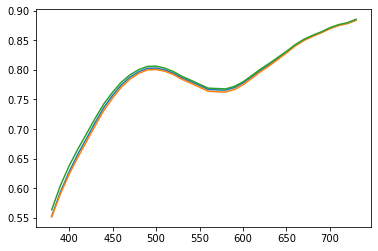

In [115]:
for i in range(len(tmp)):
    plt.plot(scols_int, [float(item) for item in tmp[scols].iloc[i]])

In [66]:
all([
        #len(tmp.fname.unique())==1,
        #len(tmp.manbran.unique())==1,
        any([
            [len(tmp.mloc.value_counts().unique())==1, len(tmp.mloc.unique())==2],
            tmp.mloc.isna().all()
        ]),
        #len(tmp.mmode.value_counts().unique())==1,
        #len(tmp.mmode.unique())==3,
        #len(tmp.mtrial.value_counts().unique())==1,
    ])

True

In [67]:
tmp.mtrial.value_counts().unique()

array([6, 3])